In [1]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.sparse.csgraph import shortest_path
from scipy import linalg


data1 = loadmat('data/isomap.mat')
im = data1['images'].reshape(64,64,698).T
data = data1['images']

In [4]:
from scipy.spatial.distance import cdist
from scipy.sparse.csgraph import shortest_path

# Make A and D matrix
eps = 12
d = data
n, m = d.shape
dist = cdist(d.T, d.T, metric='euclidean')
adj =  np.zeros((m, m))  + np.inf
range = dist < eps 
adj[range] = dist[range]
short = shortest_path(adj)
short = short.real

from scipy import linalg
d = short
dim = 2
n, m = d.shape
h = np.eye(m) - (1/m)*np.ones((m, m))

c = -1/2*h.dot(d**2).dot(h)
evals, evecs = linalg.eig(c)
idx = evals.argsort()[::-1]
evals = evals[idx]
evecs = evecs[:, idx]
evals = evals[:dim] 
evecs = evecs[:, :dim]
z = evecs.dot(np.diag(evals**(-1/2)))
z = -z.real


In [ ]:
# https://github.com/lwileczek/isomap/blob/master/README.md


# Make A and D matrix
eps = 12
n, m = data.shape
dist = cdist(data.T, data.T, metric="euclidean")
adj =  np.zeros((m, m)) + np.inf
range = dist < eps
adj[range] = dist[range]
d = shortest_path(adj).real

# centering matrix H to get C
n, m = d.shape
h = np.eye(m) - (1/m)*np.ones((m, m))
d = d**2
c = -1/(2) * h.dot(d).dot(h)


# compute leading eignvecs and eignevals
evals, evecs = linalg.eig(c)
idx = evals.argsort()[::-1]
evals = evals[idx]
evecs = evecs[:, idx]
evals = evals[:2] 
evecs = evecs[:, :2]
z = -evecs.dot(np.diag(evals**(-1/2)))
z = z.real

Text(0.5, 0, 'Right-Left Pose')

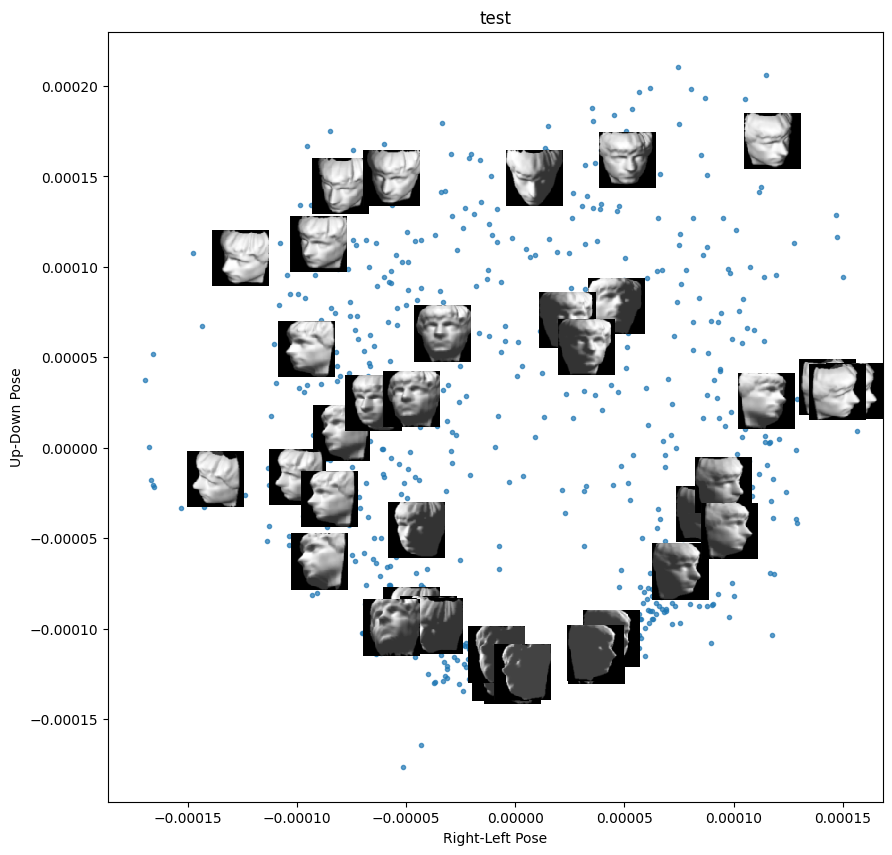

In [5]:
components = z
x_ = data.T
n, m = x_.shape
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('test')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
# Show 40 of the images ont the plot
x_size = (max(components[:, 0]) - min(components[:, 0])) * 0.08
y_size = (max(components[:, 1]) - min(components[:, 1])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, n)
    x0 = components[img_num, 0] - (x_size / 2.)
    y0 = components[img_num, 1] - (y_size / 2.)
    x1 = components[img_num, 0] + (x_size / 2.)
    y1 = components[img_num, 1] + (y_size / 2.)
    img = x_[img_num,:].reshape(64, 64).T
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))
# Show 2D components plot
ax.scatter(components[:, 0], components[:, 1], marker='.',alpha=0.7)
ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

In [ ]:
# https://github.com/lwileczek/isomap/blob/master/README.md

# Make A and D matrix
eps = 12
n, m = data.shape
dist = cdist(data.T, data.T, metric="euclidean")
adj =  np.zeros((m, m)) + np.inf
range = dist < eps
adj[range] = dist[range]
d = shortest_path(adj)

# centering matrix H to get C
n, m = d.shape
h = np.eye(m) - (1/m)*np.ones((m, m))
d = d**2
c = -1/(2) * h.dot(d).dot(h)


# compute leading eignvecs and eignevals
evals, evecs = linalg.eig(c)
idx = evals.argsort()[::-1]
evals = evals[idx]
evecs = evecs[:, idx]
evals = evals[:dim] 
evecs = evecs[:, :dim]
z = -evecs.dot(np.diag(evals**(-1/2)))

In [ ]:
n, m = data.shape
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title("my_title")
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
# Show 40 of the images ont the plot
x_size = (max(components[:, 0]) - min(components[:, 0])) * 0.08
y_size = (max(components[:, 1]) - min(components[:, 1])) * 0.08
for i in range(42):
    img_num = np.random.randint(0, m)
    x0 = components[img_num, 0] - (x_size / 2.)
    y0 = components[img_num, 1] - (y_size / 2.)
    x1 = components[img_num, 0] + (x_size / 2.)
    y1 = components[img_num, 1] + (y_size / 2.)
    img = x[:, img_num].reshape(64, 64).T
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))
# Show 2D components plot
ax.scatter(components[:, 0], components[:, 1], marker='.',alpha=0.7)
ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

In [ ]:
x = range(6)